In [623]:
import json
from matplotlib import pyplot as plt
from PIL import Image

split = 'val'
dataset = json.load(open(f"../segsub_data/segsub_data_val_v4.json", "r"))
# dataset = json.load(open(f"../segsub_data/segsub_data_labelling_sample.json", "r"))
segsub_dir = "../segsub_data/segsub_images"
coco_image_dir = f"../data/coco-images/{split}2014"
webqa_image_dir = "../data/webqa-images"

def get_image_paths(sample):
    paths = []
    for image in sample['image']:
        if isinstance(image, int):
            assert(sample['dataset'] == 'webqa')
            paths.append(f"{webqa_image_dir}/{image}.jpeg")
        elif sample['type'] == 'original':
            assert(sample['dataset'] in ['vqa', 'okvqa'])
            paths.append(f"{coco_image_dir}/{image}")
        else:
            paths.append(f"{segsub_dir}/{image}")
    return paths

# dataset = [sample for sample in dataset if sample["type"] == "conflicting"]
dataset = [sample for sample in dataset if sample["type"] == "perturbed" and len(sample["image"]) == 2]
idx = 0

# for idx in range(len(segsub_sample_data)):


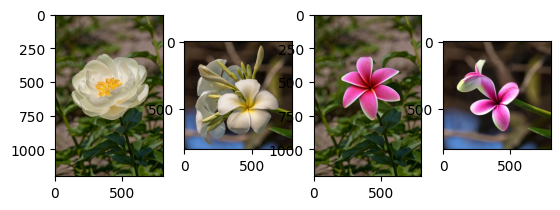

421


In [1107]:
sample = dataset[idx]
# if 'label' in sample:
#     continue
captions = sample["conversations"][0]["value"].split("\nQ: ")[:-1]
question = sample["conversations"][0]["value"].split("\nQ: ")[-1]
# print(f"Question: {question}")
answer = sample["conversations"][1]["value"]
# print(f"Answer: {answer}")
img_paths = get_image_paths(sample)
# load image from path
original_image_1 = f"{webqa_image_dir}/{img_paths[0].split('/')[-1].split('.')[0].split('_')[0]}.jpeg"
img1 = Image.open(original_image_1)

original_image_2 = f"{webqa_image_dir}/{img_paths[1].split('/')[-1].split('.')[0].split('_')[0]}.jpeg"
img2 = Image.open(original_image_2)

img1_pert = Image.open(img_paths[0])
img2_pert = Image.open(img_paths[1])

# print("Is perturbed: ", ["segsub_images" in path for path in img_paths])
# print(captions)
# render both images side by side
fig, ax = plt.subplots(1, 4)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img1_pert)
ax[3].imshow(img2_pert)
plt.show()
print(idx)
idx += 1

In [1108]:
# save the 3 images
object = "pink_flower"
img1.save(f"examples/{object}_1.png")
img2.save(f"examples/{object}_2.png")
img1_pert.save(f"examples/{object}_1_gen.png")
img2_pert.save(f"examples/{object}_2_gen.png")
idxs = [9,77,80, 153, 175, 277, 349, 398, 421]

In [1109]:
for idx in idxs:
    question = dataset[idx]["conversations"][0]["value"].split("\nQ: ")[-1]
    print(f"{question}")

"What color appeared on the uniform for the 2012 Olympic Torch carriers that didn't appear on the uniforms for the 2008 carriers?"
"Which color is found on both the Serbia and France Pavilion in 2010 Expo?"
"What colors are found on the chairs in the Borthwick Castle?"
"What shape is at the top of both the Baiyoke Tower and the Turning Torso skyscraper?"
"What color is both the primary body paint color off the 1954 Maserati A6 GCS and is also present on the wheels of the Lamborghini Veneno?"
"Which color is found on both MIT Building 32 and the Lou Ruvo Center for Brain Health?"
"What color are the ceilings in the Grand Bazaar in Istanbul?"
"What color do the Agapornis fischeri and Bay-headed Tanager both have on their face?"
"What color is at the center of both the Plumeria and the Herbaceous peony?"


In [70]:
dataset = json.load(open(f"segsub_data/segsub_data_train_v4.json", "r"))
perturbed_samples = [sample for sample in dataset if sample["type"] == "perturbed"]
one_image = [sample for sample in perturbed_samples if len(sample["image"]) == 1]
two_image = [sample for sample in perturbed_samples if len(sample["image"]) == 2]

len(one_image), len(two_image), len(perturbed_samples)

(8976, 3561, 12537)